In [1]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os

In [ ]:
base_path = 'runs_small/pose/train5'
model = YOLO(os.path.join(base_path, "weights/best.pt"))
config_file = os.path.join(base_path, "args.yaml")
dataset = "./datasets/dataset.yaml"

In [6]:
metrics = model.val(data=dataset, cfg=config_file, split='test')

Ultralytics 8.3.37  Python-3.12.3 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
YOLO11s-pose summary (fused): 257 layers, 9,805,173 parameters, 0 gradients


val: Scanning C:\Users\Andrea\Uni\IPCV\progetto\datasets\splitted\test.cache... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 11.72it/s]


                   all       1000       1000      0.973      0.981      0.989      0.742      0.859      0.855      0.835      0.473
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\pose\val5


In [5]:
print('mAP50-95: ' + str(metrics.pose.map))  # map50-95
print('mAP50: ' + str(metrics.pose.map50))  # map50

mAP50-95: 0.4729694182402896
mAP50: 0.8351195906670786


In [3]:
from pose_utils import draw_skeleton, annotate_keypoints

def inference(model, image_path):
    image = cv2.imread(image_path)

    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    # Perform inference
    results = model(image, verbose=False)

    # Extract keypoints (assuming single person detected)
    if results[0].keypoints is not None:
        keypoints = results[0].keypoints.xy.cpu().numpy()[0]  # (num_keypoints, 2)
        draw_skeleton(image, keypoints)
        annotate_keypoints(image, keypoints)
    else:
        print("No keypoints detected.")

    # Display the result
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

Comparison with original pre-trained model

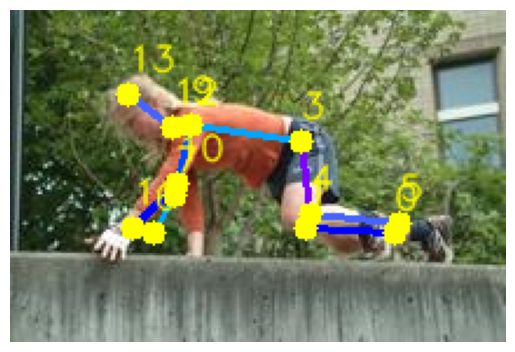

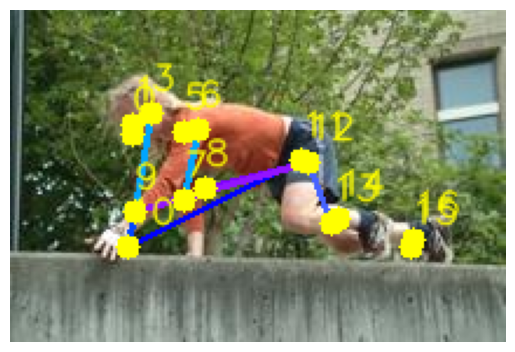

In [ ]:
model = YOLO(os.path.join(base_path, "weights/best.pt"))
inference(model, "./datasets/split/test/im09004.jpg")

model = YOLO("./yolo11n-pose.pt")
inference(model, "./datasets/split/test/im09004.jpg")